### Linear Regression

Linear regression quantifies the relationship between one or more predictor variable and one outcome variable. 

It can be interpreted with the equation
y = mx + c

where,
y => Dependent variable
x => Independent vaianle
m => Slope (constant)
c => Intercept (constant)

### 1. Data Exporation

In [83]:
#Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [84]:
#Importing the dataset

df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
#Checking the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [85]:
# Stats Check

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### 2. Exploratory Data Analysis

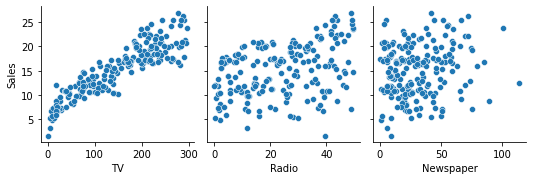

In [16]:
# Plotting the data wrt the dependent variable### 1. Data Exporation

a=list(df.columns)
a.remove('Sales')
sns.pairplot(data=df, x_vars=a,y_vars='Sales')
plt.show()

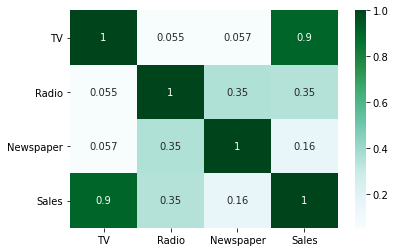

In [19]:
# Correlation Check

sns.heatmap(df.corr(), annot=True, cmap='BuGn')
plt.show()

### 3. ML Model Development

In [86]:
#Splitting Training & Testing sets

#X = df[a]
X = df.TV
y = df.Sales

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75, random_state=5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train_sm=sm.add_constant(X_train)
X_train_sm

(150,) (50,) (150,) (50,)


,const,TV
123,1.0,123.1
107,1.0,90.4
43,1.0,206.9
152,1.0,197.6
114,1.0,78.2
...,...,...
73,1.0,129.4
144,1.0,96.2
118,1.0,125.7
189,1.0,18.7


In [87]:
# Evaluating the ML Model

LR = sm.OLS(y_train,X_train_sm).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     620.8
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           8.16e-55
Time:                        23:24:28   Log-Likelihood:                -341.27
No. Observations:                 150   AIC:                             686.5
Df Residuals:                     148   BIC:                             692.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9181      0.376     18.388      0.000       6.175       7.662
TV             0.0561      0.002     24.916      0.000       0.052       0.061
==============================================================================
Omnibus:                        0.628   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.612
Skew:                          -0.152   Prob(JB):                        0.737
Kurtosis:                       2.925   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

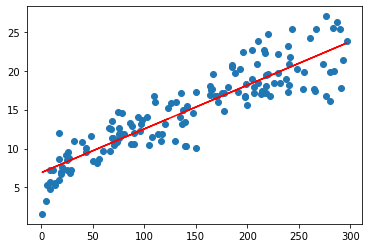

In [88]:
# Visualising the model

plt.scatter(X_train, y=y_train)
plt.plot(X_train, LR.params[0]+LR.params[1]*X_train, 'r')
plt.show()

### 4. Making Predictions

In [89]:
#Predicting Test set
LR.predict(sm.add_constant(X_test))

119     8.006562
77     13.678715
148     9.050104
149     9.426003
154    17.454539
151    13.706767
122    19.485518
6      10.144139
28     20.876906
71     13.078398
188    22.963989
34     12.287326
21     20.237316
40     18.279273
55     18.077298
104    20.282200
3      15.417950
39     19.709935
117    11.204512
134     8.988389
180    15.704083
26     14.935453
54     21.656757
165    20.074614
53     17.162796
93     20.994725
174    19.395751
17     22.705909
56      7.327699
84     18.896422
25     21.667978
156    12.186338
42     23.390382
141    17.785555
50     18.127792
51     12.551017
195     9.061324
116    14.727866
142    19.289152
24     10.413440
159    14.307084
62     20.343915
166     7.922406
45     16.742014
23     19.726766
1       9.414782
162    17.488202
48     19.665052
160    16.596142
126     7.355751
dtype: float64

In [ ]:
<<<-----------------------------THE END----------------------------------->>>